# Validation, Regularization and Callbacks

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


### Validation Sets
load the data

In [2]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

In [3]:
diabetes_dataset.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [9]:
print(diabetes_dataset['DESCR'])
print(diabetes_dataset['data'].shape)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [12]:
data = diabetes_dataset['data']
targets = diabetes_dataset['target']


normalizing target values

In [16]:
targets = (targets - targets.mean())/targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [17]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.15)

In [18]:
train_data.shape, test_data.shape, train_targets.shape, test_targets.shape

((375, 10), (67, 10), (375,), (67,))

### Building model

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 129       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [73]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.MeanSquaredError()
accuracy = tf.keras.metrics.Accuracy()
MAE = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

### training the model

In [74]:
model.fit(train_data, train_targets, batch_size=128, epochs=100,
          validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 167ms/step - loss: 0.8224 - mae: 0.8224 - val_loss: 0.9013 - val_mae: 0.9013
Epoch 2/100
3/3 [==============================] - 0s 43ms/step - loss: 0.8210 - mae: 0.8210 - val_loss: 0.8886 - val_mae: 0.8886
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 0.8083 - mae: 0.8083 - val_loss: 0.8703 - val_mae: 0.8703
Epoch 4/100
3/3 [==============================] - 0s 50ms/step - loss: 0.8124 - mae: 0.8124 - val_loss: 0.8470 - val_mae: 0.8470
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 0.7840 - mae: 0.7840 - val_loss: 0.8178 - val_mae: 0.8178
Epoch 6/100
3/3 [==============================] - 0s 38ms/step - loss: 0.7468 - mae: 0.7468 - val_loss: 0.7806 - val_mae: 0.7806
Epoch 7/100
3/3 [=====

In [75]:
history = model.history.history
history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

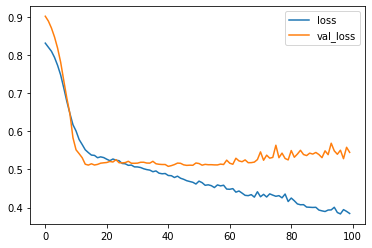

In [76]:
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [77]:
model.evaluate(test_data, test_targets, verbose=2)

3/3 - 0s - loss: 0.6404 - mae: 0.6404


[0.6404324173927307, 0.6404324173927307]

In [78]:
model_regularization = Sequential([
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.005, 0.005),
          bias_regularizer=tf.keras.regularizers.l1_l2(0.005, 0.005), input_shape=(10,)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.005, 0.005)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.005, 0.005)),
    Dropout(0.5),
    Dense(1)
])
model_regularization.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                

In [79]:
model_regularization.compile(optimizer=adam,loss=loss, metrics=[MAE])
model_regularization.fit(train_data, train_targets, batch_size=128, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
3/3 - 2s - loss: 14.2260 - mean_absolute_error: 0.8291 - val_loss: 10.6073 - val_mean_absolute_error: 0.8998
Epoch 2/100
3/3 - 0s - loss: 9.4581 - mean_absolute_error: 0.8236 - val_loss: 6.9124 - val_mean_absolute_error: 0.9067
Epoch 3/100
3/3 - 0s - loss: 6.0866 - mean_absolute_error: 0.8325 - val_loss: 4.5185 - val_mean_absolute_error: 0.9103
Epoch 4/100
3/3 - 0s - loss: 3.9615 - mean_absolute_error: 0.8290 - val_loss: 3.2253 - val_mean_absolute_error: 0.9102
Epoch 5/100
3/3 - 0s - loss: 2.9141 - mean_absolute_error: 0.8301 - val_loss: 2.9536 - val_mean_absolute_error: 0.9180
Epoch 6/100
3/3 - 0s - loss: 2.8425 - mean_absolute_error: 0.8367 - val_loss: 3.0728 - val_mean_absolute_error: 0.9173
Epoch 7/100
3/3 - 0s - loss: 2.8384 - mean_absolute_error: 0.8378 - val_loss: 2.7725 - val_mean_absolute_error: 0.9145
Epoch 8/100
3/3 - 0s - loss: 2.4974 - mean_absolute_error: 0.8387 - val_loss: 2.3249 - val_mean_absolute_error: 0.9119
Epoch 9/100
3/3 - 0s - loss: 2.0540 - mean_abs

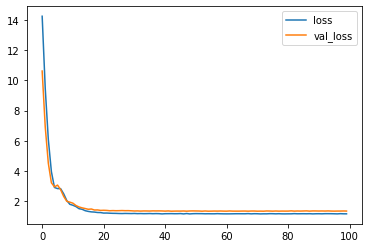

In [80]:
history = model_regularization.history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [81]:
model.evaluate(test_data, test_targets, verbose=2)

3/3 - 0s - loss: 0.6404 - mae: 0.6404


[0.6404324173927307, 0.6404324173927307]

In [82]:
model_regularization.evaluate(test_data, test_targets, verbose=2)

3/3 - 0s - loss: 1.1881 - mean_absolute_error: 0.8845


[1.1881368160247803, 0.8845019936561584]